In [1]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Replacement counts


In [15]:
import json
import pandas as pd
import os

# Define datasets and directions
datasets = [
    "anatomy",
    "clinical_knowledge",
    "college_biology",
    "college_medicine",
    "medical_genetics",
    "medmcqa",
    "medqa",
    "professional_medicine",
    "pubmed_qa",
    "usmle_sa_step1",
    "usmle_sa_step2",
    "usmle_sa_step3",
]
replacement_directions = ["brand_to_generic", "generic_to_brand", "none"]


def load_replacement_counts(dataset, direction):
    """
    Load the replacement counts from a JSON file.

    Args:
    dataset (str): The dataset name.
    direction (str): The direction of replacements (e.g., brand_to_generic, generic_to_brand).

    Returns:
    pd.DataFrame: A DataFrame containing the replacement counts.
    """
    counts_file_path = (
        f"onBrand/replacement_counts/{dataset}/2024-05-14/{direction}_replacements.json"
    )

    if os.path.exists(counts_file_path):
        with open(counts_file_path, "r") as file:
            drug_replacement_counts = json.load(file)

        df_replacements = pd.DataFrame(drug_replacement_counts)
        df_replacements["Dataset"] = dataset
        df_replacements["Direction"] = direction

        return df_replacements
    else:
        return pd.DataFrame(
            columns=["old", "replaced", "count", "Dataset", "Direction"]
        )


# Initialize an empty DataFrame for replacements
replacements_df = pd.DataFrame(
    columns=["old", "replaced", "count", "Dataset", "Direction"]
)

# Load replacement counts for each dataset and direction
for dataset in datasets:
    for direction in replacement_directions:
        df_replacements = load_replacement_counts(dataset, direction)
        if not df_replacements.empty:
            replacements_df = pd.concat(
                [replacements_df, df_replacements], ignore_index=True
            )

# Ensure count is integer
replacements_df["count"] = replacements_df["count"].astype(int)

# Group by Dataset and Direction, and sum the counts of replacements
replacements_sum = (
    replacements_df.groupby(["Dataset", "Direction"])["count"].sum().reset_index()
)

# Save the summed replacements to a CSV file
output_file_path = "summed_replacements_counts.csv"
replacements_sum.to_csv(output_file_path, index=False)

print("\nSummed Replacements Counts:")
print(replacements_sum)


Summed Replacements Counts:
          Dataset         Direction  count
0         medmcqa  brand_to_generic    158
1         medmcqa  generic_to_brand     47
2           medqa  brand_to_generic    216
3           medqa  generic_to_brand     97
4  usmle_sa_step1  brand_to_generic     26
5  usmle_sa_step1  generic_to_brand      9
6  usmle_sa_step2  brand_to_generic     34
7  usmle_sa_step2  generic_to_brand     22
8  usmle_sa_step3  brand_to_generic     22
9  usmle_sa_step3  generic_to_brand     19


## Model results


In [16]:
# Define the models, datasets, and replacement directions
models = [
    "BioMistral-BioMistral-7B",
    "EleutherAI-gpt-neo-2.7B",
    "EleutherAI-pythia-70m",
    "openai-community-gpt2-xl",
]


def load_model_results(model, direction):
    """
    Load the model results from a JSON file.

    Args:
    model (str): The model name.
    direction (str): The direction of replacements (e.g., brand_to_generic, generic_to_brand).

    Returns:
    pd.DataFrame: A DataFrame containing the model results.
    """
    results_file_path = f"onBrand/results/{model}/{direction}/{direction}_results.json"

    if os.path.exists(results_file_path):
        with open(results_file_path, "r") as file:
            results_data = json.load(file)

        results = results_data["results"]
        results_list = []

        for dataset, metrics in results.items():
            for metric, value in metrics.items():
                if metric.startswith("acc"):
                    metric_name = metric.split(",")[0]
                    results_list.append([dataset, metric_name, value])

        df_results = pd.DataFrame(results_list, columns=["Dataset", "Metric", "Value"])
        df_results["Model"] = model
        df_results["Direction"] = direction

        return df_results
    else:
        return pd.DataFrame(
            columns=["Dataset", "Metric", "Value", "Model", "Direction"]
        )


# Initialize an empty DataFrame to store the final results
results_df = pd.DataFrame(columns=["Dataset", "Metric", "Value", "Model", "Direction"])

# Load and store the model results
for model in models:
    for direction in replacement_directions:
        df_model_results = load_model_results(model, direction)
        if not df_model_results.empty:
            results_df = pd.concat([results_df, df_model_results], ignore_index=True)

# Save the results to a CSV file
results_output_file_path = "model_results.csv"
results_df.to_csv(results_output_file_path, index=False)

print("\nModel Results DataFrame:")
print(results_df.head())


Model Results DataFrame:
   Dataset           Metric     Value                     Model  \
0  onBrand              acc  0.409634  BioMistral-BioMistral-7B   
1  onBrand       acc_stderr  0.088686  BioMistral-BioMistral-7B   
2  onBrand         acc_norm  0.414251  BioMistral-BioMistral-7B   
3  onBrand  acc_norm_stderr  0.000304  BioMistral-BioMistral-7B   
4  medmcqa              acc  0.405212  BioMistral-BioMistral-7B   

          Direction  
0  brand_to_generic  
1  brand_to_generic  
2  brand_to_generic  
3  brand_to_generic  
4  brand_to_generic  


/tmp/ipykernel_44835/1751749435.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, df_model_results], ignore_index=True)


## Visualise number replacements


/tmp/ipykernel_44835/2160220375.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_44835/2160220375.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


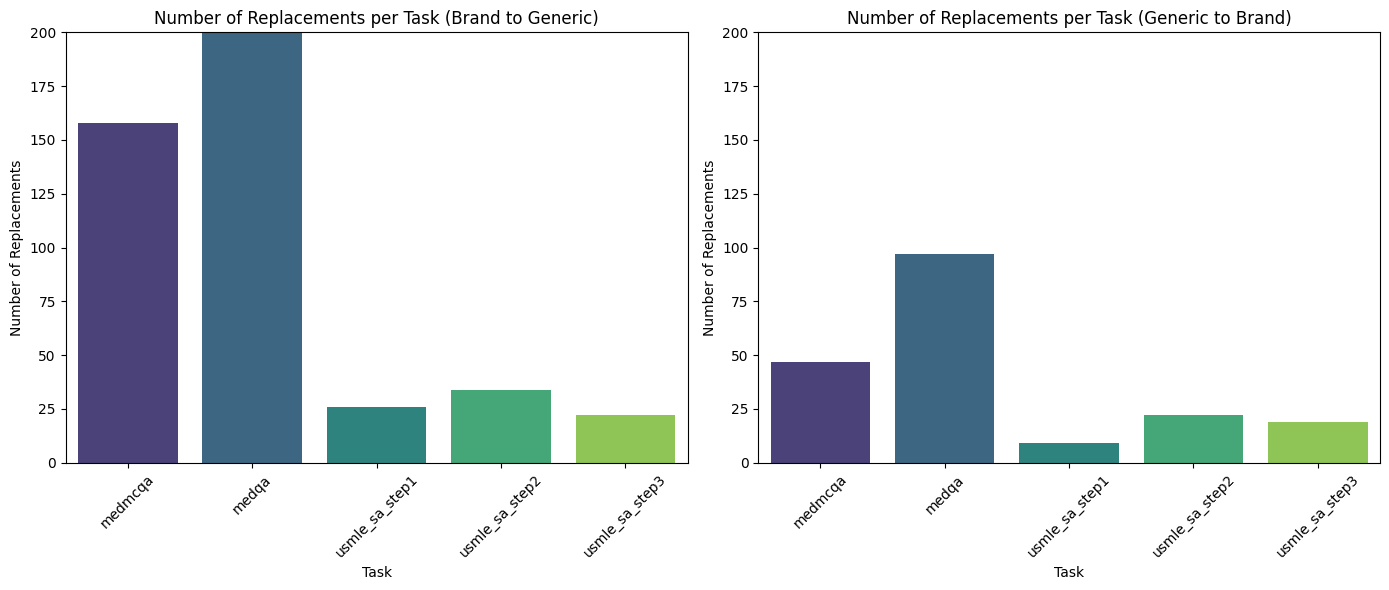

In [17]:
# Create separate histograms for each direction
plt.figure(figsize=(14, 6))

# Histogram for brand_to_generic
plt.subplot(1, 2, 1)
sns.barplot(
    data=replacements_sum[replacements_sum["Direction"] == "brand_to_generic"],
    x="Dataset",
    y="count",
    palette="viridis",
)
plt.xticks(rotation=45)
plt.title("Number of Replacements per Task (Brand to Generic)")
plt.xlabel("Task")
plt.ylabel("Number of Replacements")

plt.ylim(0, 200)

# Histogram for generic_to_brand
plt.subplot(1, 2, 2)
sns.barplot(
    data=replacements_sum[replacements_sum["Direction"] == "generic_to_brand"],
    x="Dataset",
    y="count",
    palette="viridis",
)
plt.xticks(rotation=45)
plt.title("Number of Replacements per Task (Generic to Brand)")
plt.xlabel("Task")
plt.ylabel("Number of Replacements")

plt.ylim(0, 200)

plt.tight_layout()
plt.show()

## Visualise difference in performance


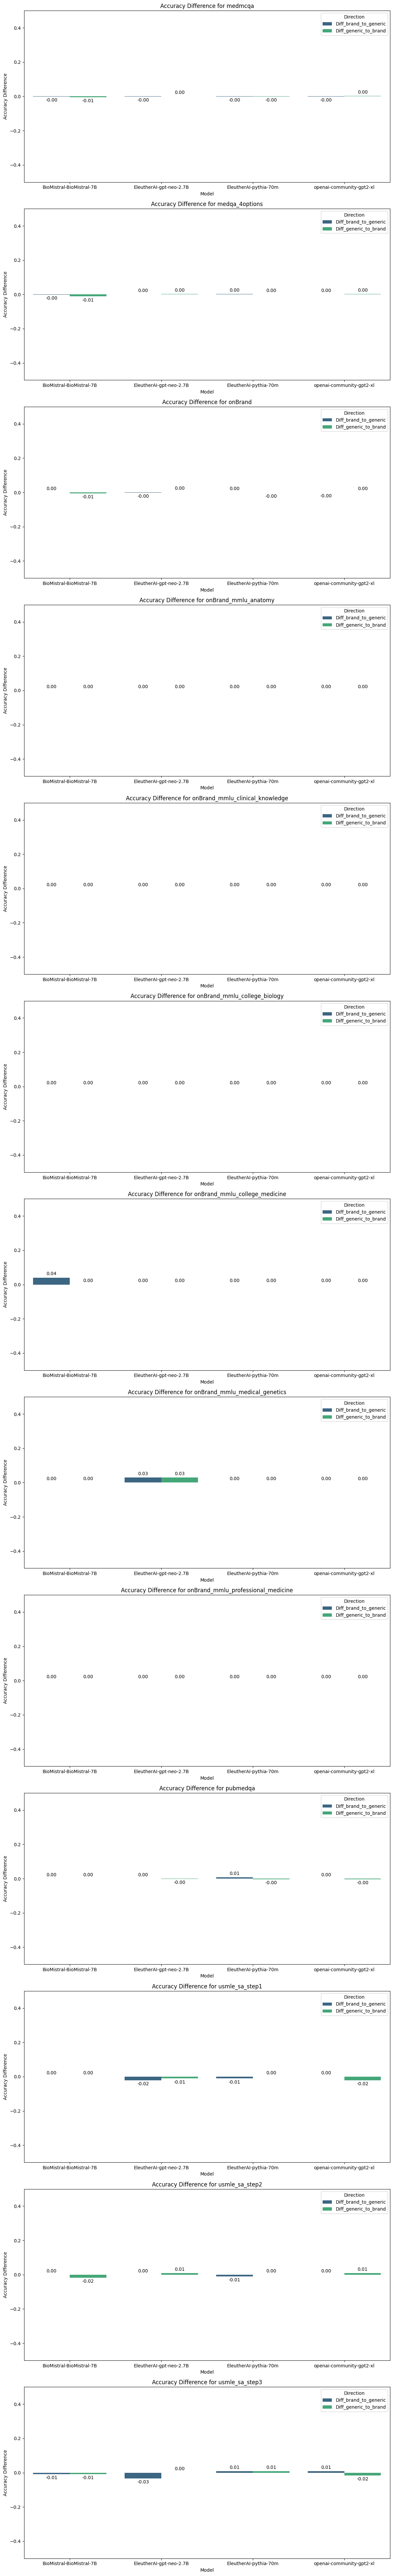

In [18]:
# Filter the results DataFrame to include only accuracy metrics
results_df_filtered = results_df[results_df["Metric"] == "acc"]

# Pivot the DataFrame to have directions as columns
pivot_results = results_df_filtered.pivot_table(
    index=["Dataset", "Model"], columns="Direction", values="Value"
).reset_index()

# Calculate the differences
pivot_results["Diff_brand_to_generic"] = (
    pivot_results["brand_to_generic"] - pivot_results["none"]
)
pivot_results["Diff_generic_to_brand"] = (
    pivot_results["generic_to_brand"] - pivot_results["none"]
)

# Melt the DataFrame for plotting
melted_results = pivot_results.melt(
    id_vars=["Dataset", "Model"],
    value_vars=["Diff_brand_to_generic", "Diff_generic_to_brand"],
    var_name="Direction",
    value_name="Accuracy Difference",
)

# Create bar plots for each task
tasks = melted_results["Dataset"].unique()
num_tasks = len(tasks)
fig, axes = plt.subplots(nrows=num_tasks, ncols=1, figsize=(12, num_tasks * 6))

for i, task in enumerate(tasks):
    ax = axes[i] if num_tasks > 1 else axes
    sns.barplot(
        x="Model",
        y="Accuracy Difference",
        hue="Direction",
        data=melted_results[melted_results["Dataset"] == task],
        palette="viridis",
        ax=ax,
    )

    # Add labels on top of the bars
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3)

    ax.set_title(f"Accuracy Difference for {task}")
    ax.set_xlabel("Model")
    ax.set_ylabel("Accuracy Difference")
    ax.legend(title="Direction")
    ax.set_ylim(-0.5, 0.5)  # Adjust the y-axis limits as needed

plt.tight_layout()
plt.show()

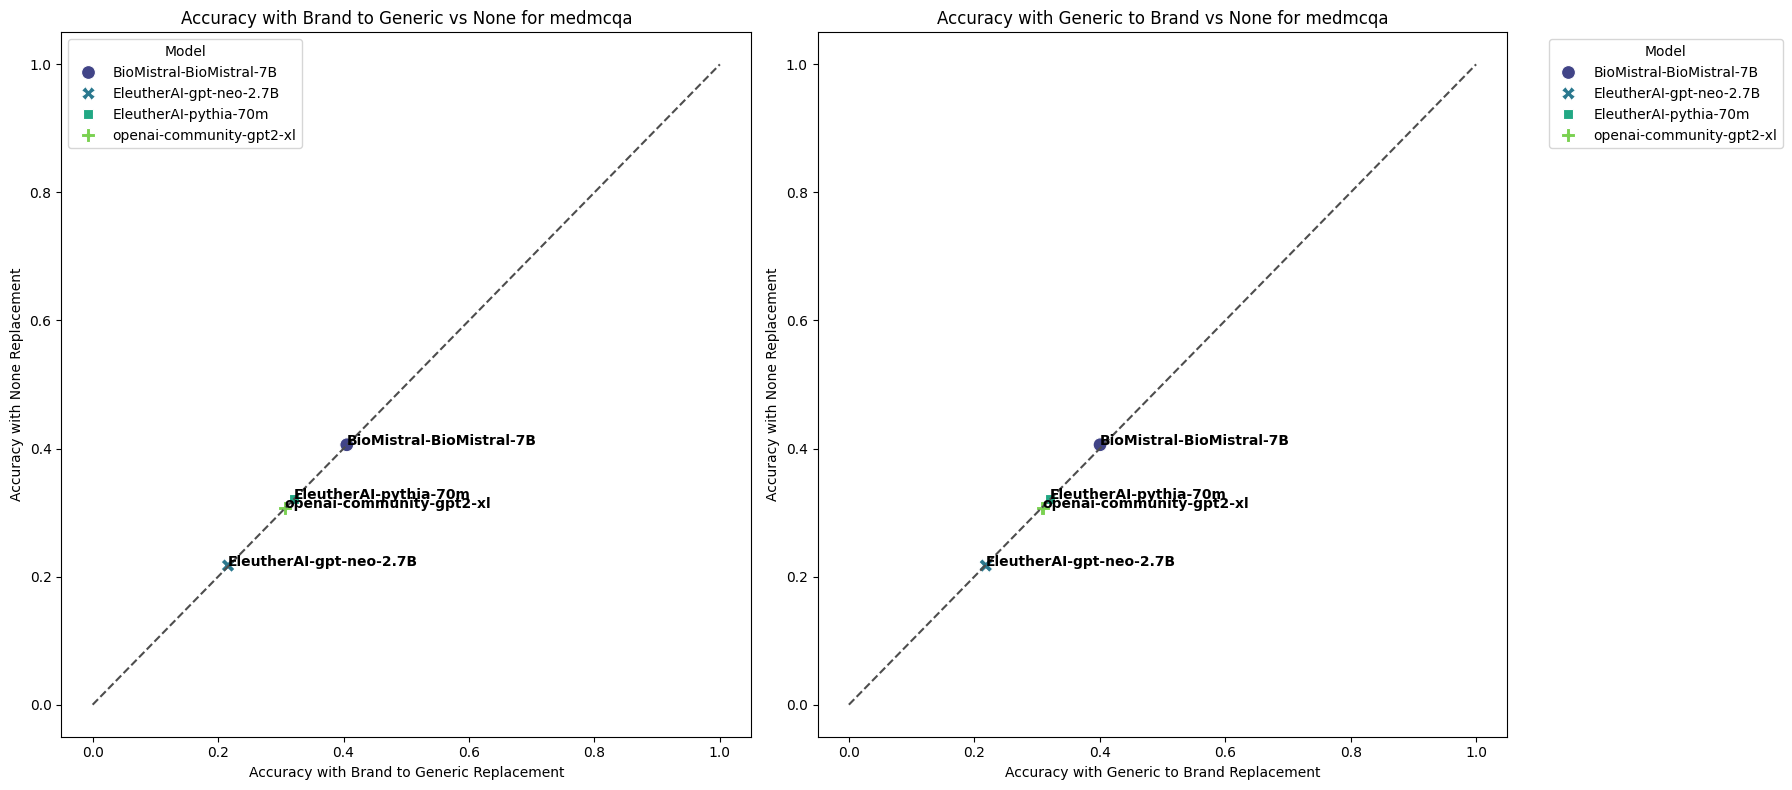

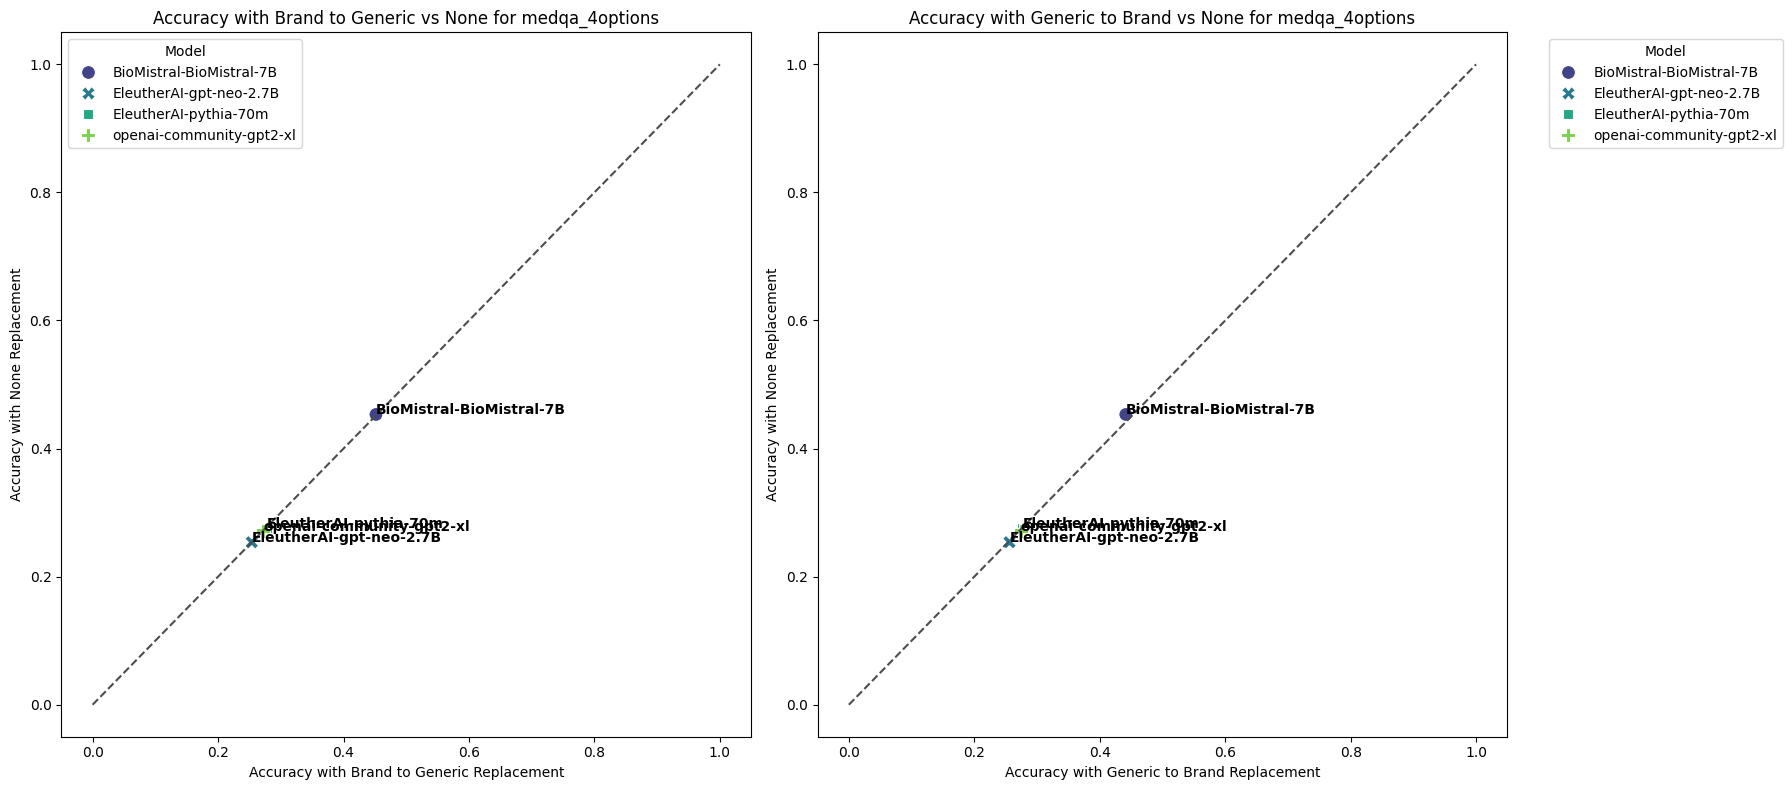

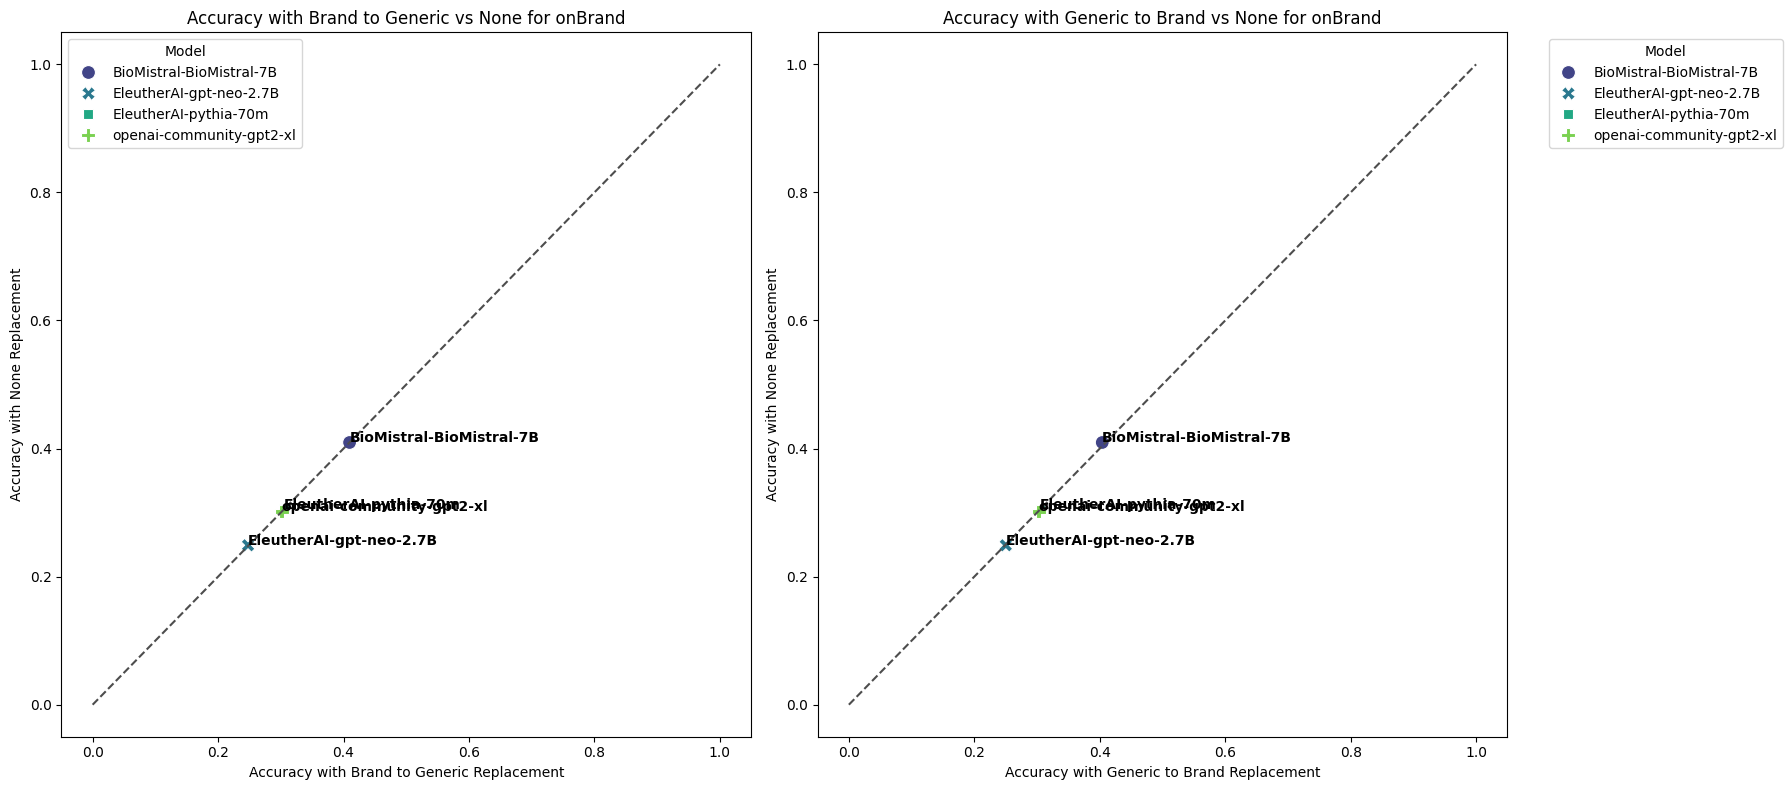

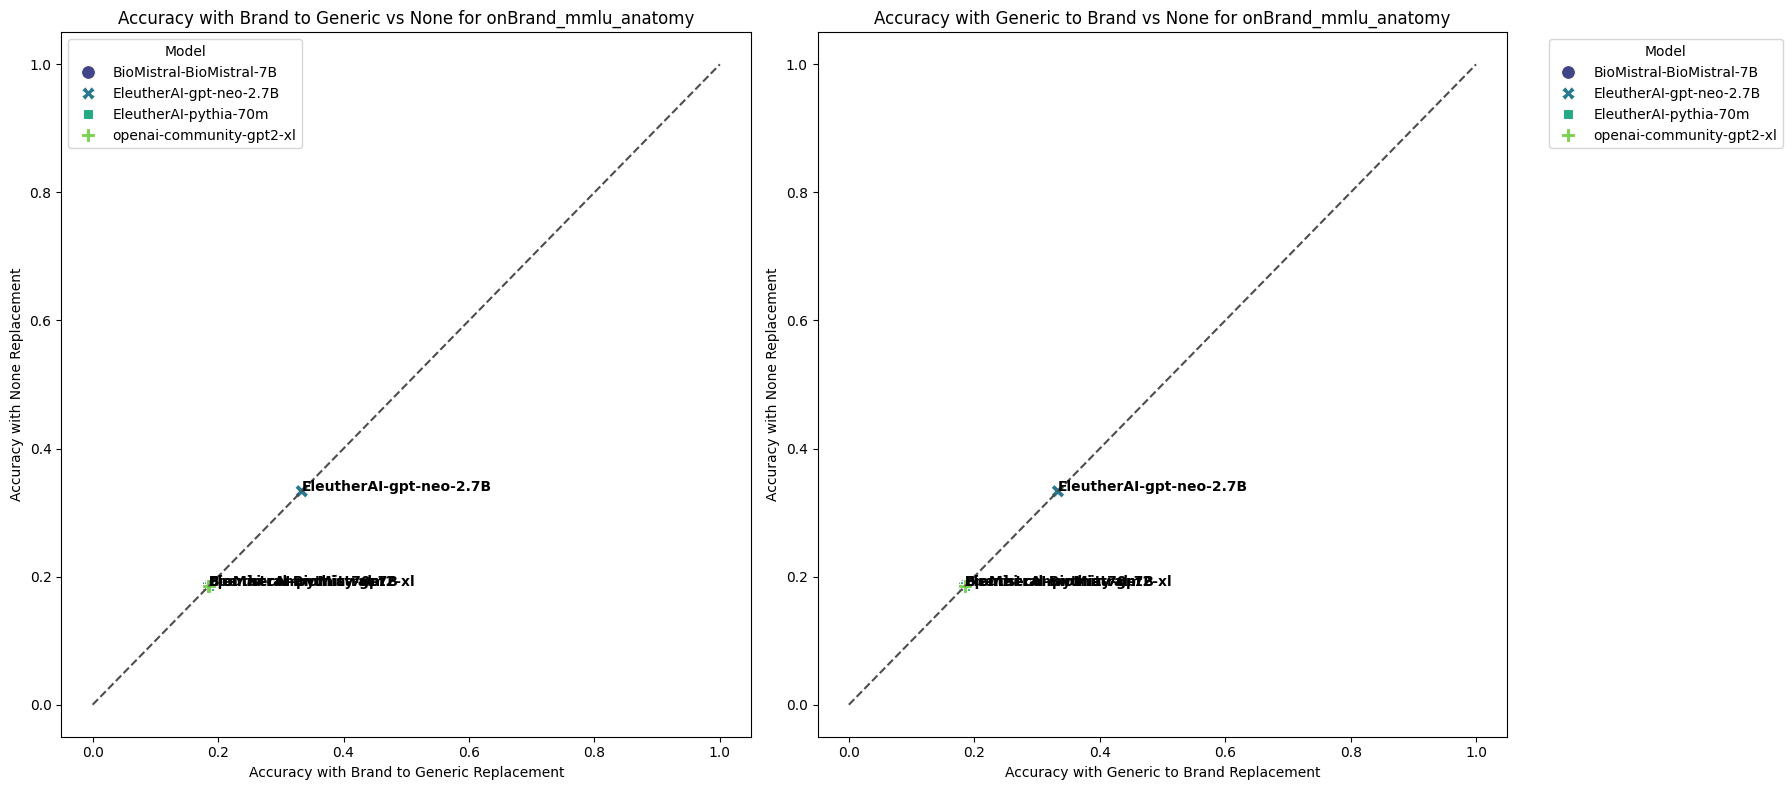

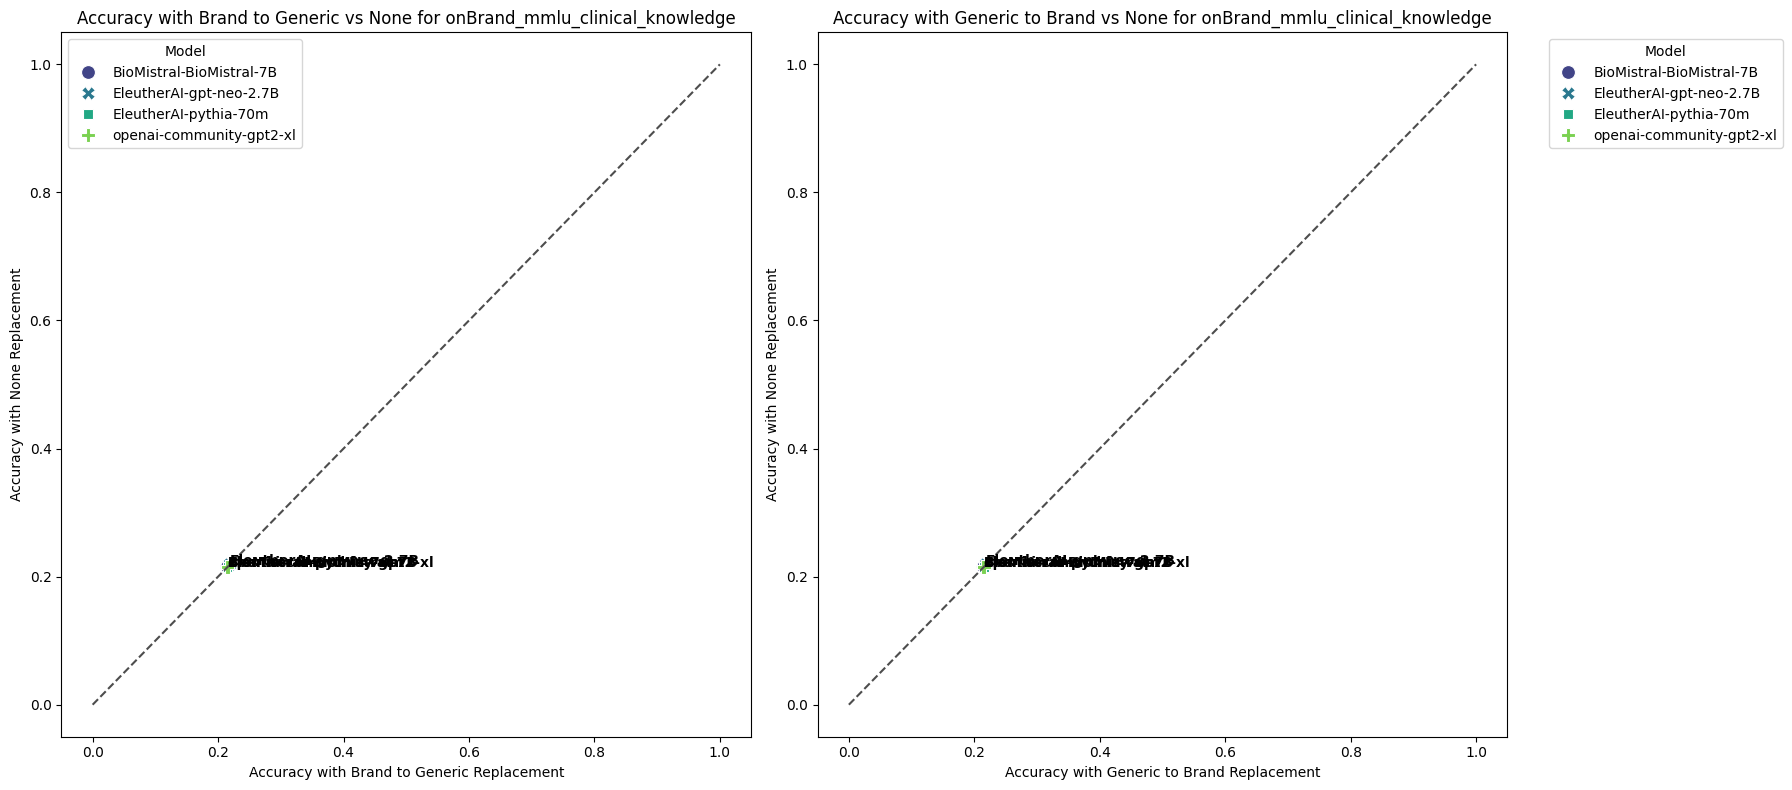

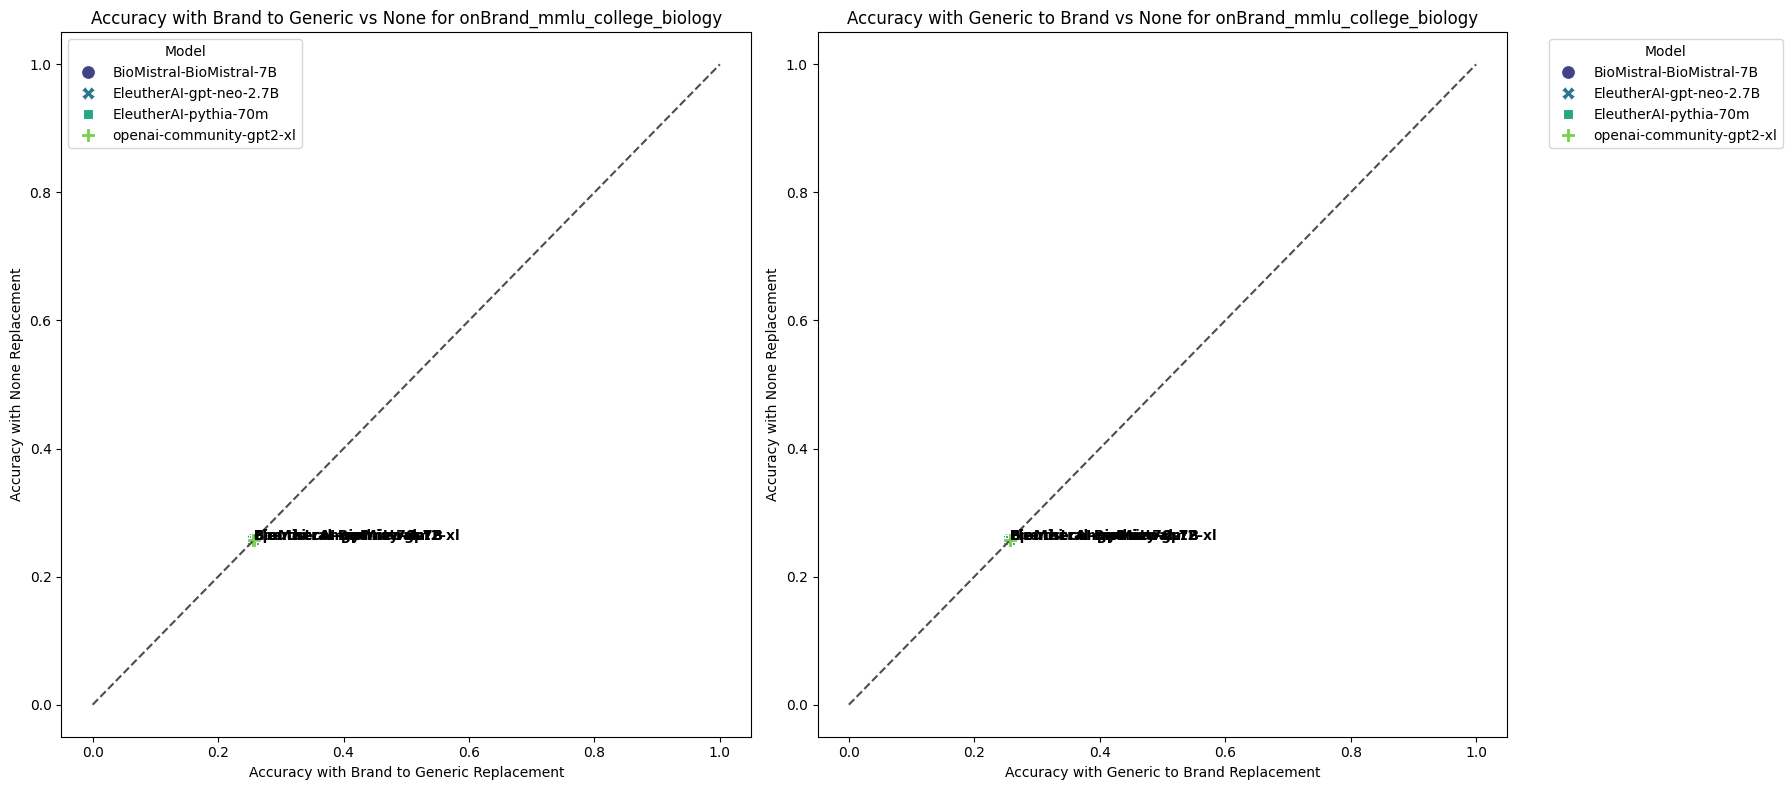

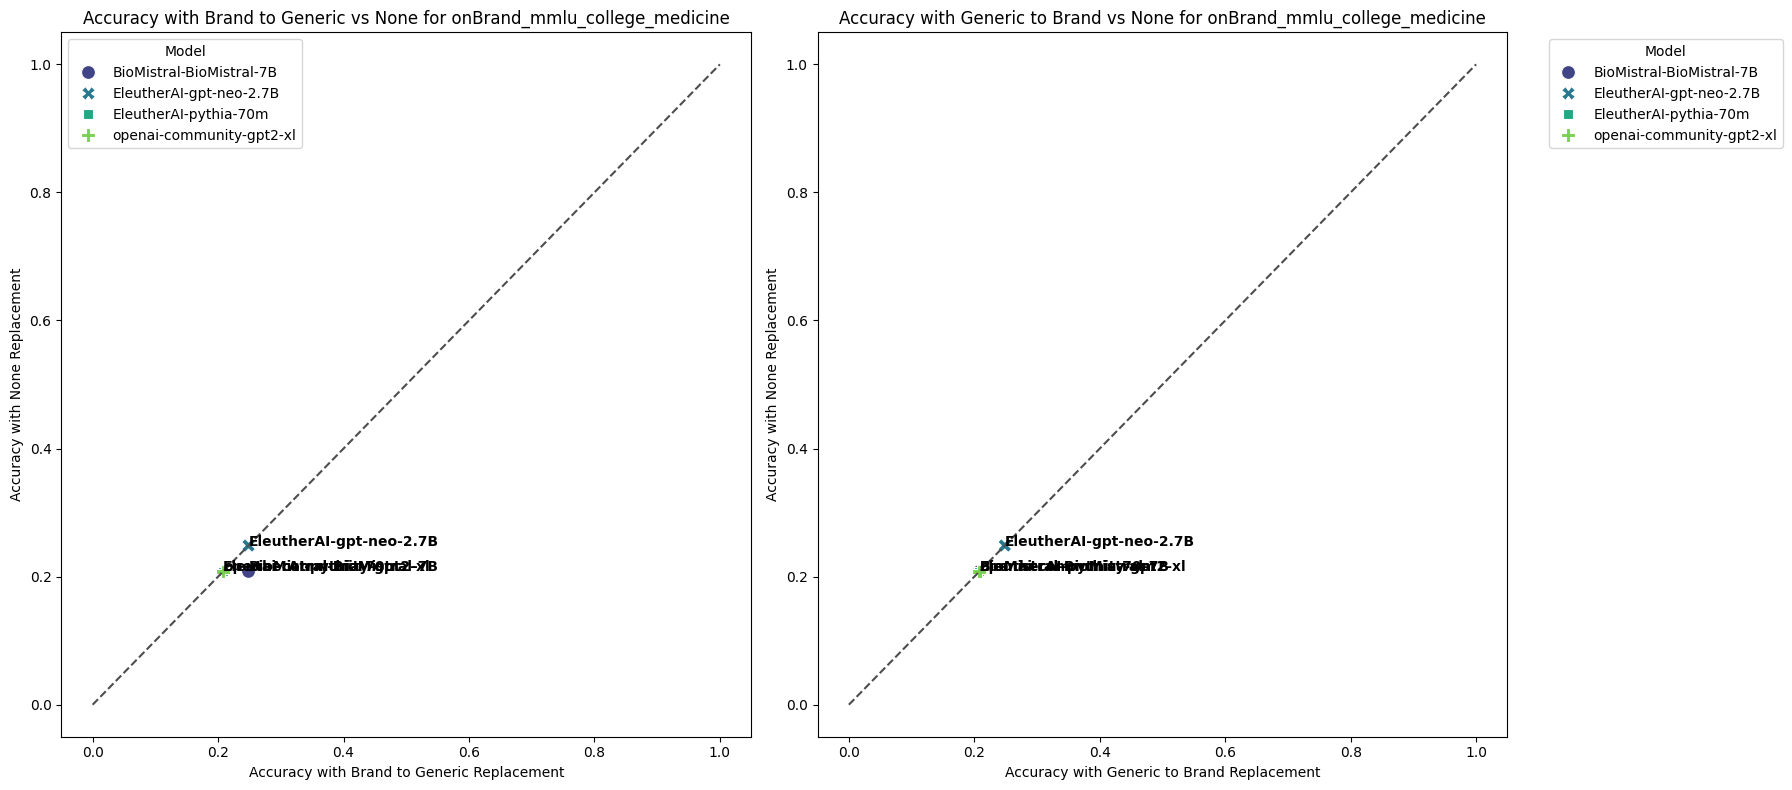

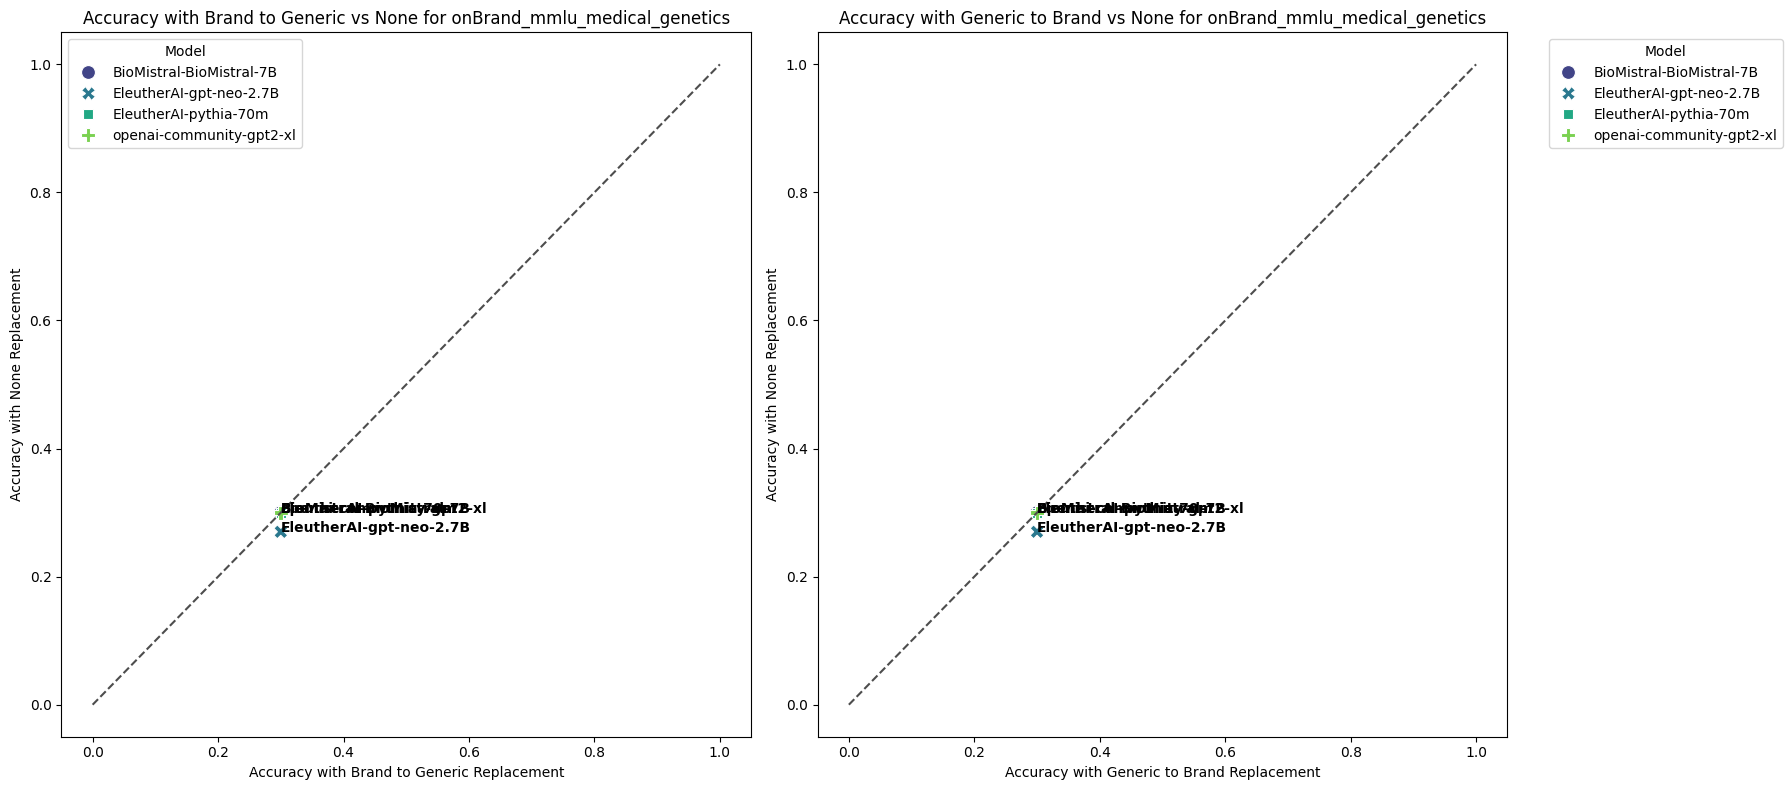

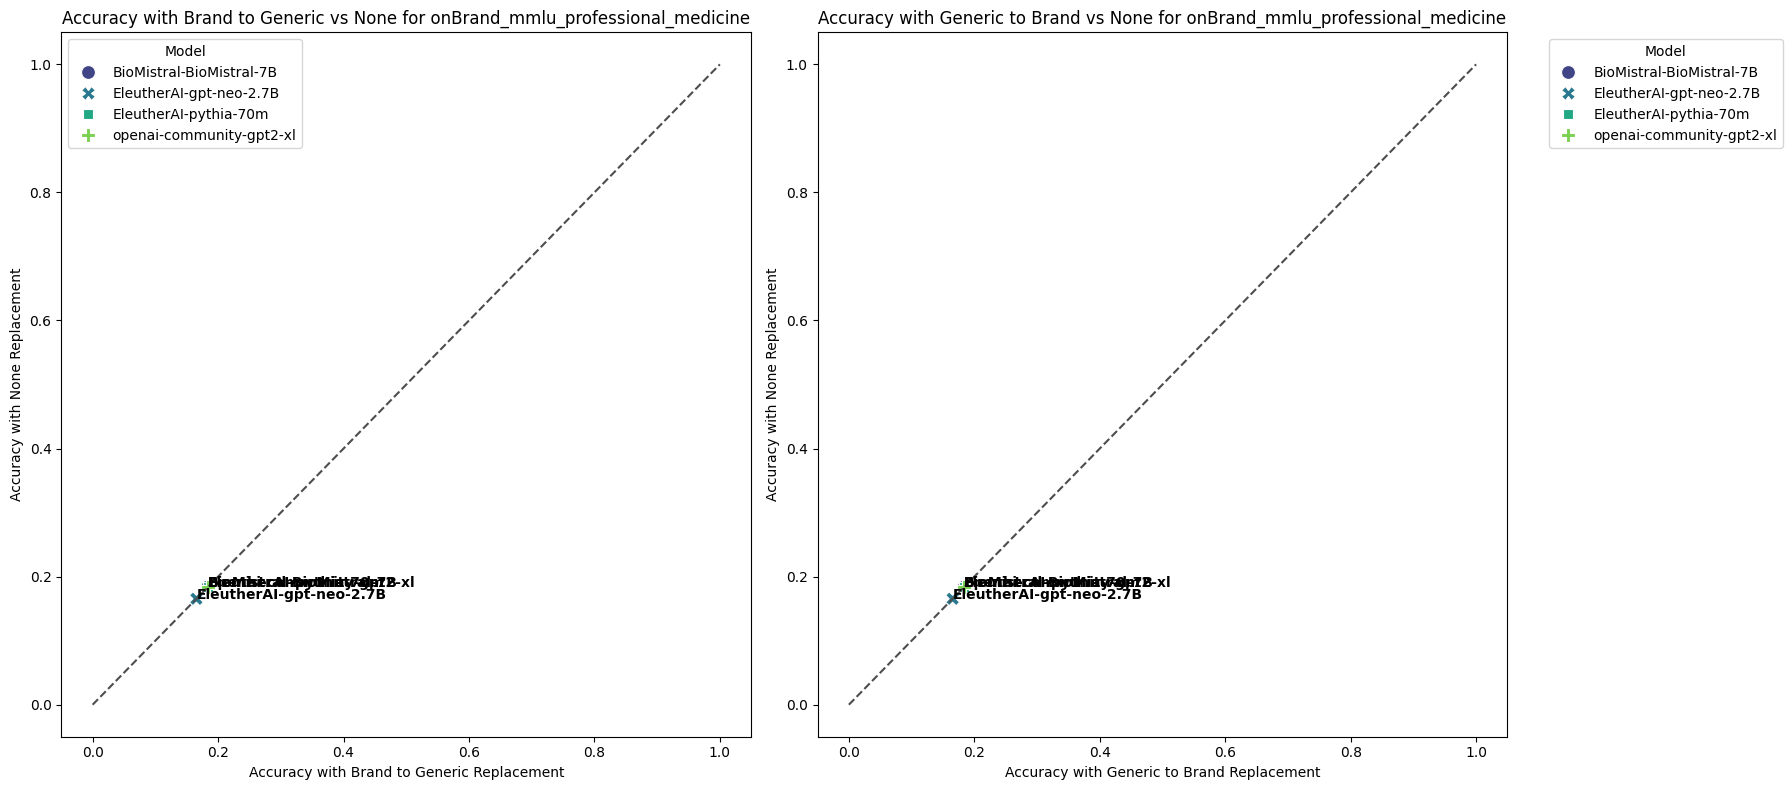

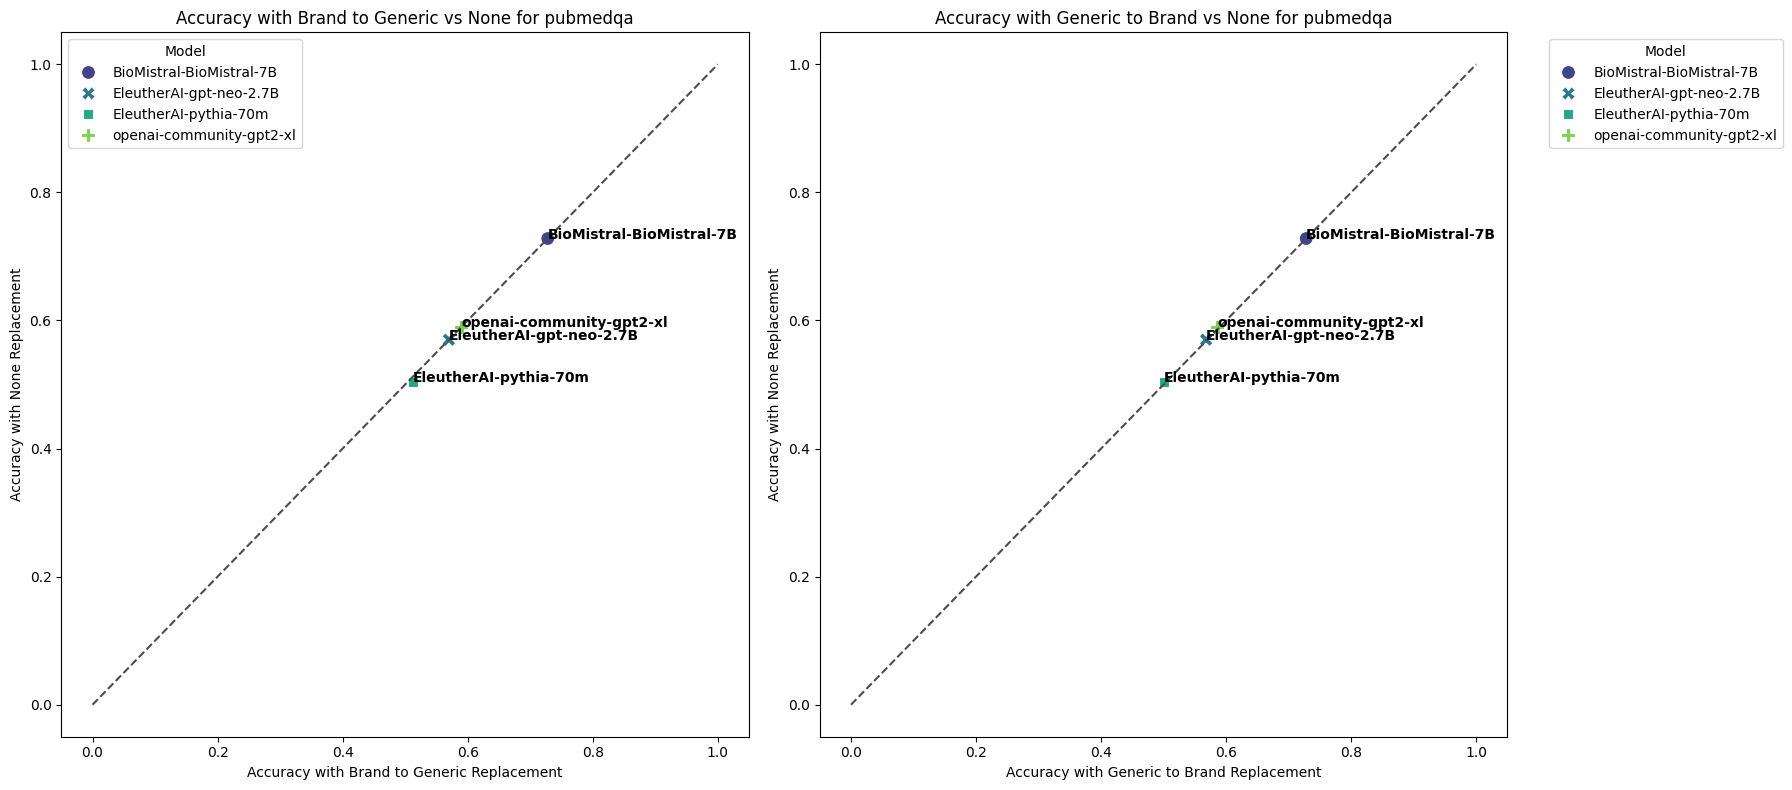

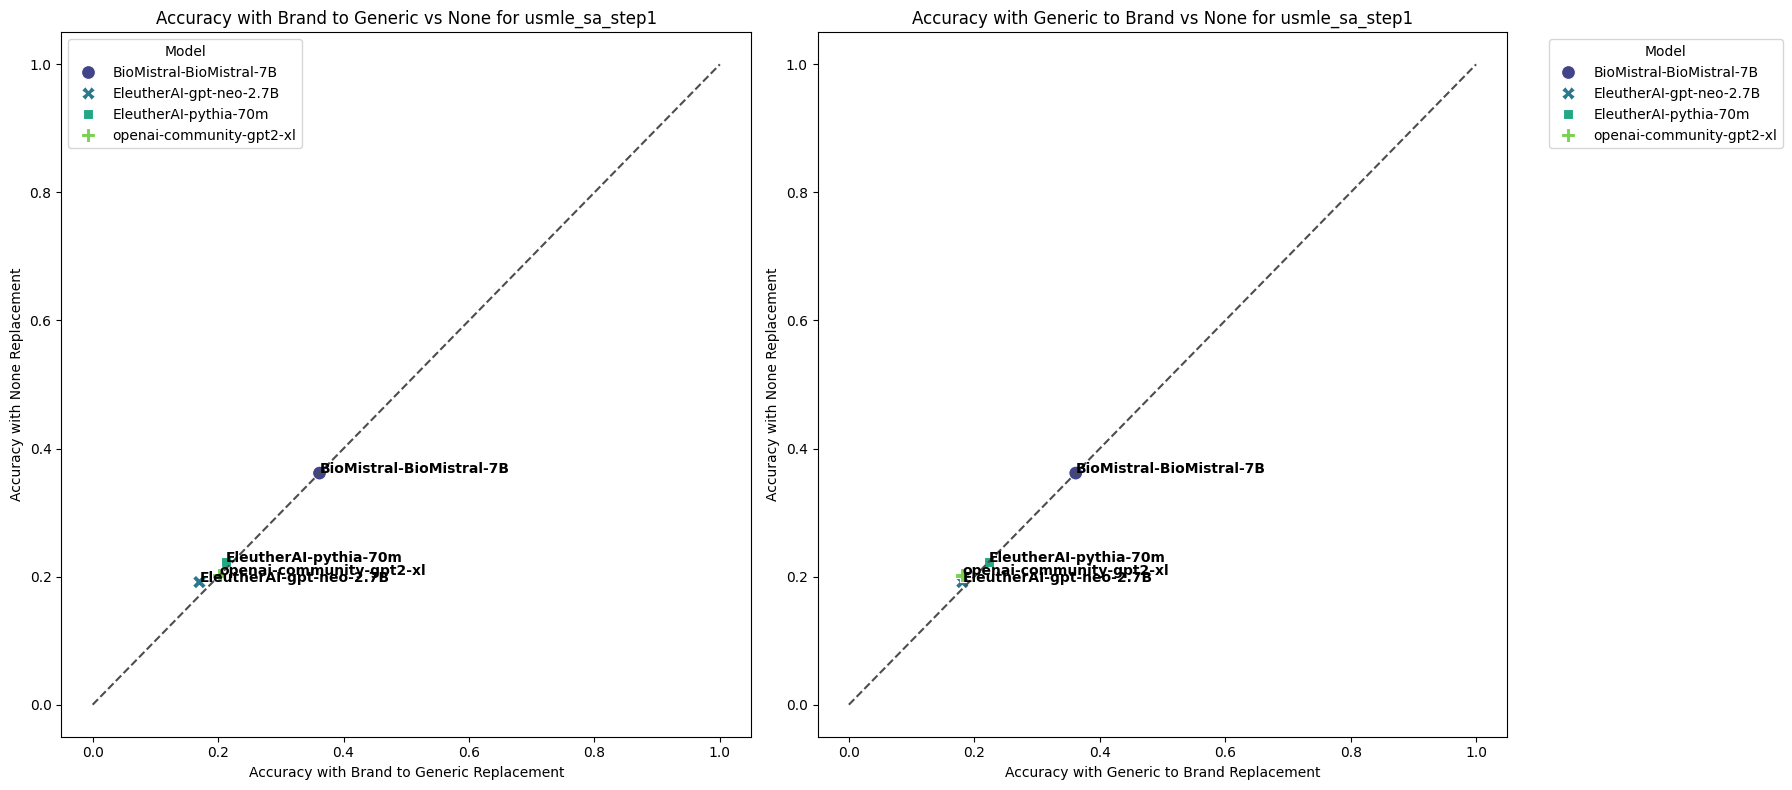

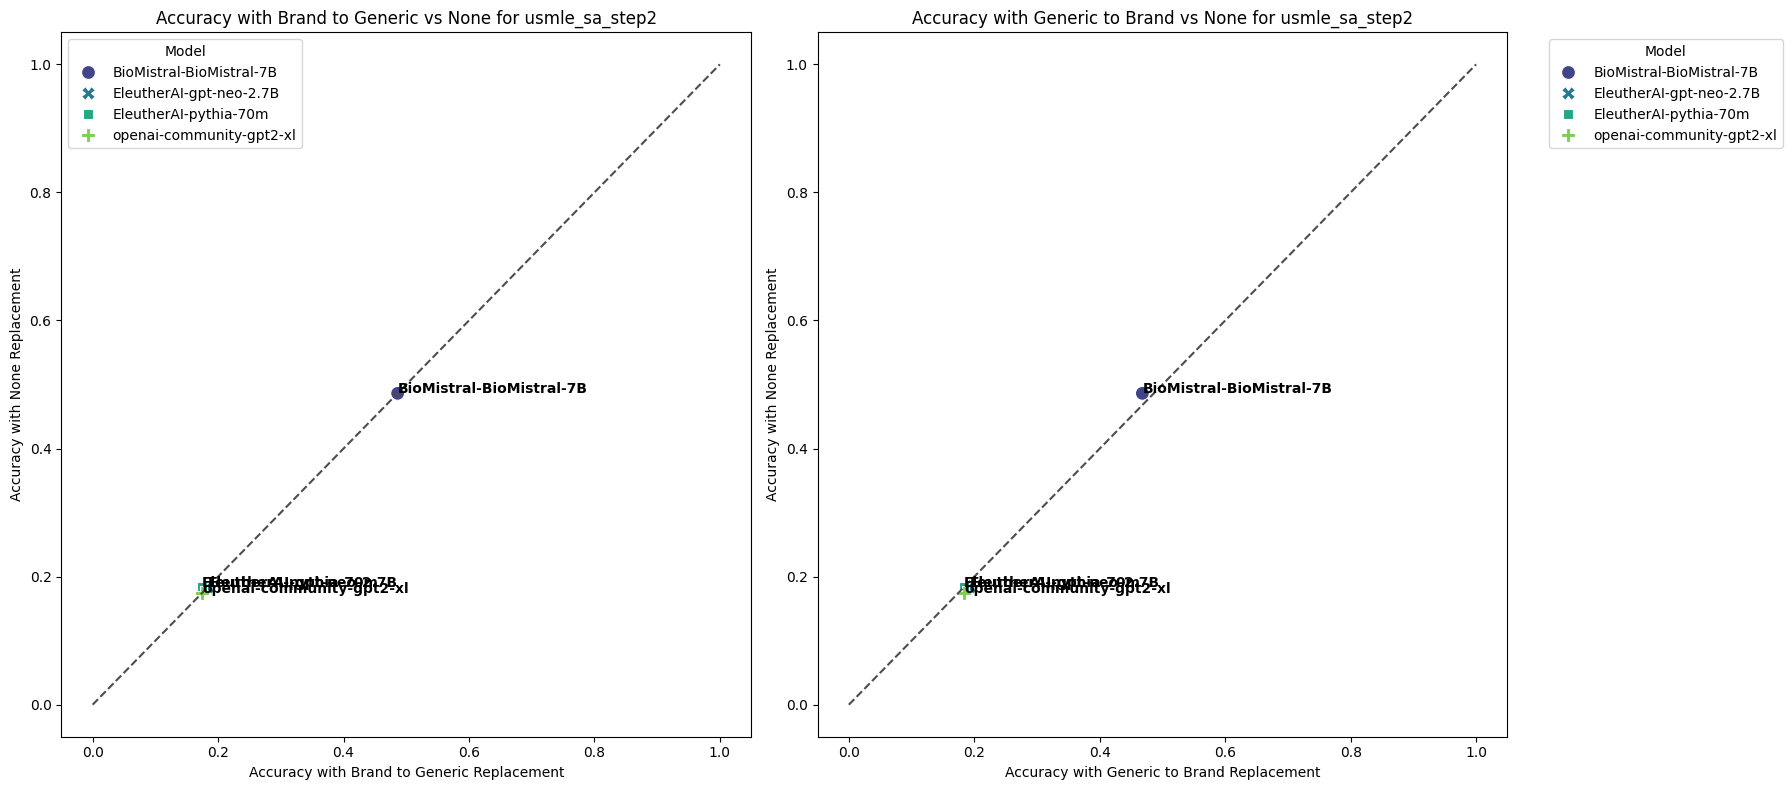

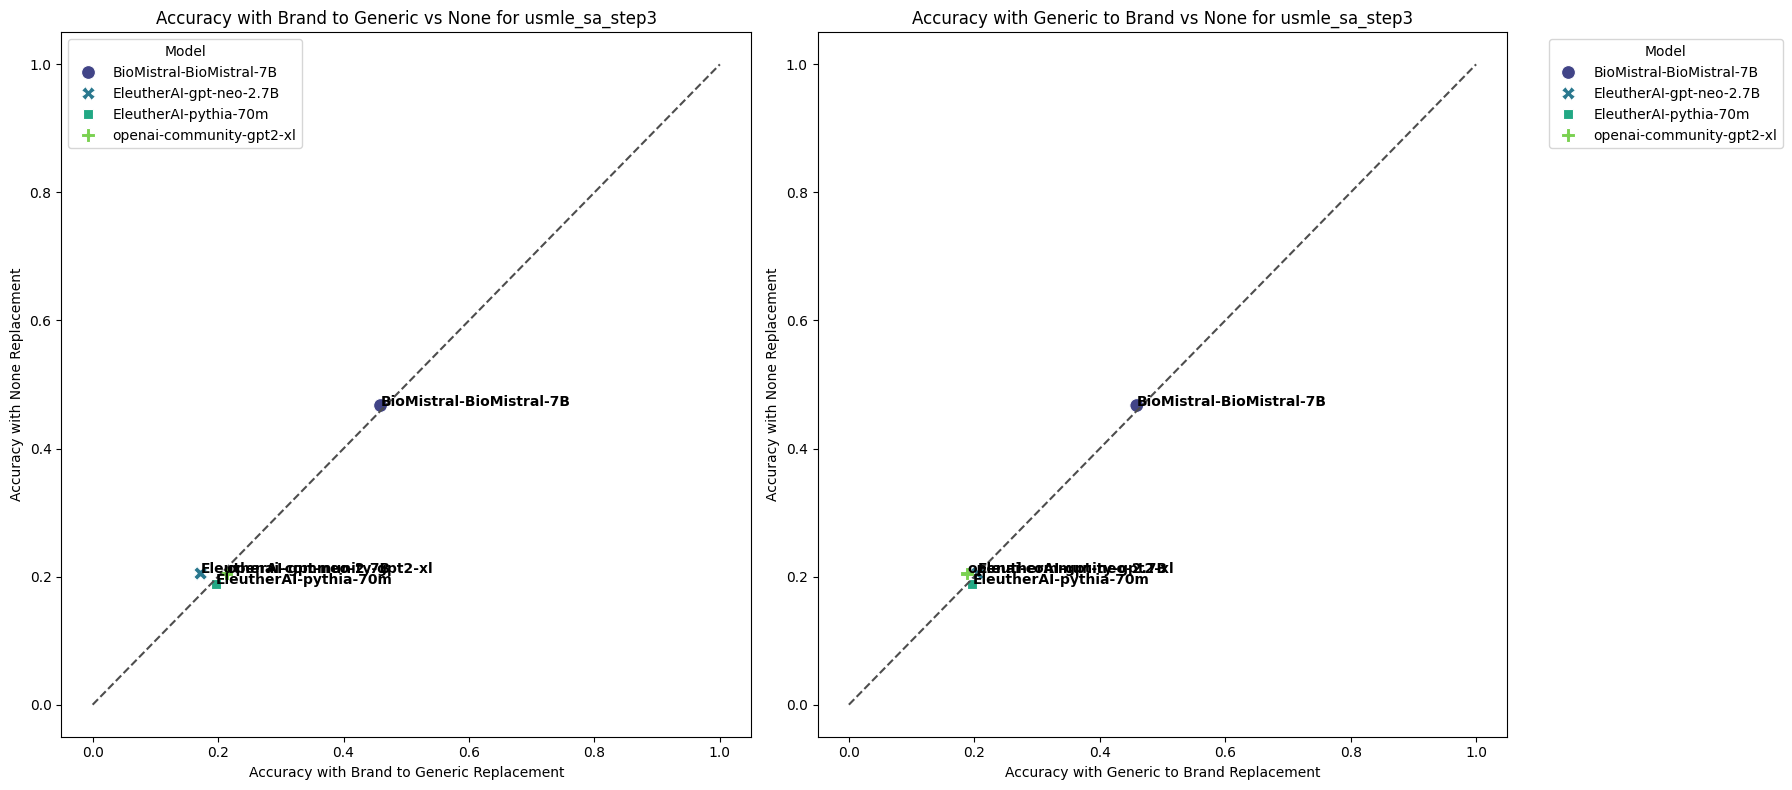

In [19]:
# Filter the results DataFrame to include only accuracy metrics for "none", "brand_to_generic", and "generic_to_brand"
filtered_results_df = results_df_filtered[
    results_df_filtered["Direction"].isin(
        ["none", "brand_to_generic", "generic_to_brand"]
    )
]

# Pivot the DataFrame to have directions as columns
pivot_results = filtered_results_df.pivot_table(
    index=["Dataset", "Model"], columns="Direction", values="Value"
).reset_index()

# Get the unique tasks
tasks = pivot_results["Dataset"].unique()

# Create scatter plots for each task
for task in tasks:
    task_data = pivot_results[pivot_results["Dataset"] == task]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

    # Scatter plot for brand_to_generic
    sns.scatterplot(
        data=task_data,
        x="brand_to_generic",
        y="none",
        hue="Model",
        style="Model",
        palette="viridis",
        s=100,
        ax=axes[0],
    )
    for line in range(0, task_data.shape[0]):
        axes[0].text(
            task_data["brand_to_generic"].iloc[line],
            task_data["none"].iloc[line],
            task_data["Model"].iloc[line],
            horizontalalignment="left",
            size="medium",
            color="black",
            weight="semibold",
        )
    axes[0].plot([0, 1], [0, 1], ls="--", c=".3")  # Diagonal line
    axes[0].set_title(f"Accuracy with Brand to Generic vs None for {task}")
    axes[0].set_xlabel("Accuracy with Brand to Generic Replacement")
    axes[0].set_ylabel("Accuracy with None Replacement")

    # Scatter plot for generic_to_brand
    sns.scatterplot(
        data=task_data,
        x="generic_to_brand",
        y="none",
        hue="Model",
        style="Model",
        palette="viridis",
        s=100,
        ax=axes[1],
    )
    for line in range(0, task_data.shape[0]):
        axes[1].text(
            task_data["generic_to_brand"].iloc[line],
            task_data["none"].iloc[line],
            task_data["Model"].iloc[line],
            horizontalalignment="left",
            size="medium",
            color="black",
            weight="semibold",
        )
    axes[1].plot([0, 1], [0, 1], ls="--", c=".3")  # Diagonal line
    axes[1].set_title(f"Accuracy with Generic to Brand vs None for {task}")
    axes[1].set_xlabel("Accuracy with Generic to Brand Replacement")
    axes[1].set_ylabel("Accuracy with None Replacement")

    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()